In [30]:
import sympy as sym
from IPython.display import display


# ###################################################################
def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    alpha = [0] * (n + 1)  # coefficients for the tridiagonal system
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i]-h[i-1]*z[i-1])/l[i]]

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]

        print(j, a, b, c[j], d)
        S= a + b * (x - xs[j]) + c[j] * (x - xs[j])**2 + d * (x - xs[j])**3
        splines.append(S)
    splines.reverse()
    return splines

1 5 1.0 -4.5 1.5
0 1 5.5 0.0 -1.5


-1.5*x**3 + 5.5*x + 1

1.0*x + 1.5*(x - 1)**3 - 4.5*(x - 1)**2 + 4.0

______


-1.5*x**3 + 5.5*x + 1

1.5*x**3 - 9.0*x**2 + 14.5*x - 2.0

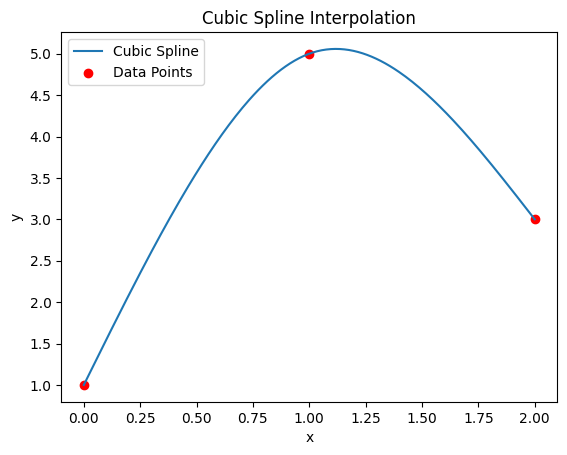

In [31]:
import numpy as np

xs = [0, 1, 2]
ys = [1, 5, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

import matplotlib.pyplot as plt

x_vals = np.linspace(min(xs), max(xs), 200)
y_vals = np.zeros_like(x_vals)

for i, S in enumerate(splines):
    # Each spline is valid in [xs[i], xs[i+1]]
    mask = (x_vals >= xs[i]) & (x_vals <= xs[i+1])
    y_vals[mask] = [float(S.subs('x', x)) for x in x_vals[mask]]

plt.plot(x_vals, y_vals, label='Cubic Spline')
plt.scatter(xs, ys, color='red', label='Data Points')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation')
plt.show()


1 -4 4.0 4.5 -1.5
0 -5 -0.5 0.0 1.5


1.5*x**3 - 0.5*x - 5

4.0*x - 1.5*(x - 1)**3 + 4.5*(x - 1)**2 - 8.0

______


1.5*x**3 - 0.5*x - 5

-1.5*x**3 + 9.0*x**2 - 9.5*x - 2.0

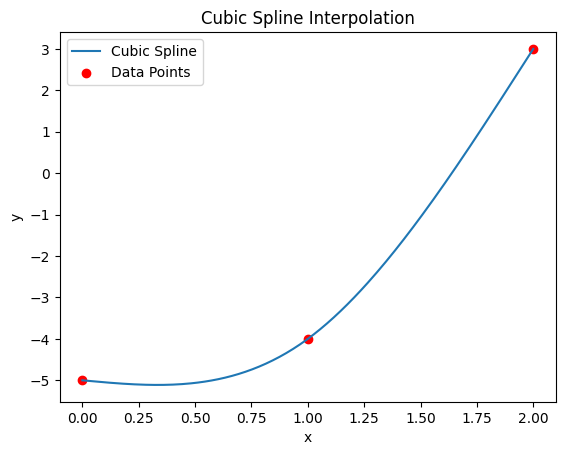

In [32]:
import numpy as np

xs = [0, 1, 2]
ys = [-5, -4, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

import matplotlib.pyplot as plt

x_vals = np.linspace(min(xs), max(xs), 200)
y_vals = np.zeros_like(x_vals)

for i, S in enumerate(splines):
    # Each spline is valid in [xs[i], xs[i+1]]
    mask = (x_vals >= xs[i]) & (x_vals <= xs[i+1])
    y_vals[mask] = [float(S.subs('x', x)) for x in x_vals[mask]]

plt.plot(x_vals, y_vals, label='Cubic Spline')
plt.scatter(xs, ys, color='red', label='Data Points')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation')
plt.show()


2 5 1.0 -6.0 2.0
1 1 4.0 3.0 -3.0
0 -1 1.0 0.0 1.0


1.0*x**3 + 1.0*x - 1

4.0*x - 3.0*(x - 1)**3 + 3.0*(x - 1)**2 - 3.0

1.0*x + 2.0*(x - 2)**3 - 6.0*(x - 2)**2 + 3.0

______


1.0*x**3 + 1.0*x - 1

-3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0

2.0*x**3 - 18.0*x**2 + 49.0*x - 37.0

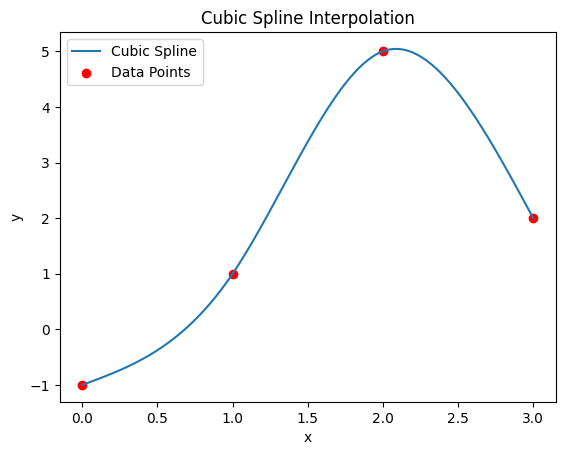

In [33]:
import numpy as np

xs = [0, 1, 2, 3]
ys = [-1, 1, 5, 2]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

import matplotlib.pyplot as plt

x_vals = np.linspace(min(xs), max(xs), 200)
y_vals = np.zeros_like(x_vals)

for i, S in enumerate(splines):
    # Each spline is valid in [xs[i], xs[i+1]]
    mask = (x_vals >= xs[i]) & (x_vals <= xs[i+1])
    y_vals[mask] = [float(S.subs('x', x)) for x in x_vals[mask]]

plt.plot(x_vals, y_vals, label='Cubic Spline')
plt.scatter(xs, ys, color='red', label='Data Points')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation')
plt.show()


In [ ]:
from matplotlib.animation import FuncAnimation

def cubic_spline_clamped(xs: list[float], ys: list[float], fp0: float, fpn: float) -> list[sym.Symbol]:
    """
    Cubic spline interpolation with clamped boundary conditions.
    xs, ys: data points
    fp0: derivative at the first point
    fpn: derivative at the last point
    Returns: list of symbolic expressions for the cubic spline interpolation.
    """
    points = sorted(zip(xs, ys), key=lambda x: x[0])
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1

    h = [xs[i + 1] - xs[i] for i in range(n)]
    alpha = [0] * (n + 1)
    alpha[0] = 3 * (ys[1] - ys[0]) / h[0] - 3 * fp0
    alpha[n] = 3 * fpn - 3 * (ys[n] - ys[n - 1]) / h[n - 1]
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [2 * h[0]]
    u = [0.5]
    z = [alpha[0] / l[0]]
    for i in range(1, n):
        l.append(2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])
    l.append(h[n - 1] * (2 - u[n - 1]))
    z.append((alpha[n] - h[n - 1] * z[n - 1]) / l[n])

    c = [0] * (n + 1)
    b = [0] * n
    d = [0] * n
    x = sym.Symbol("x")
    splines = [None] * n

    c[n] = z[n]
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b[j] = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        S = a + b[j] * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d[j] * (x - xs[j]) ** 3
        splines[j] = S
    return splines



0.6*x**3 + 1.4*x**2 - 1

4.6*x - 3.8*(x - 1)**3 + 3.2*(x - 1)**2 - 3.6

-0.4*x + 5.6*(x - 2)**3 - 8.2*(x - 2)**2 + 5.8

______


0.6*x**3 + 1.4*x**2 - 1

-3.8*x**3 + 14.6*x**2 - 13.2*x + 3.4

5.6*x**3 - 41.8*x**2 + 99.6*x - 71.8

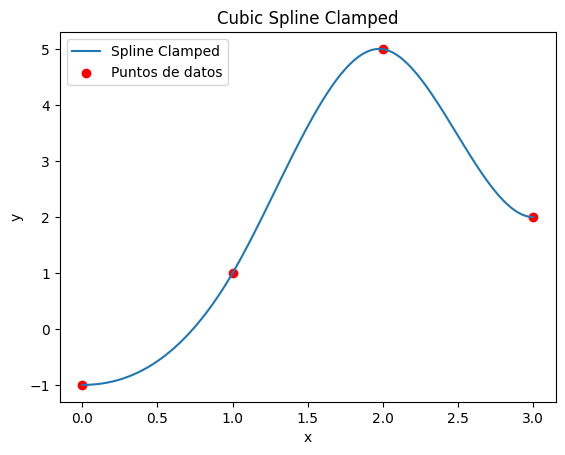

In [35]:
# Ejemplo :
fp0 = 0  # Derivada en el primer punto
fpn = 0  # Derivada en el último punto
splines_clamped = cubic_spline_clamped(xs, ys, fp0, fpn)
_ = [display(s) for s in splines_clamped]
print("______")
_ = [display(s.expand()) for s in splines_clamped]

y_vals_clamped = np.zeros_like(x_vals)
for i, S in enumerate(splines_clamped):
    mask = (x_vals >= xs[i]) & (x_vals <= xs[i+1])
    y_vals_clamped[mask] = [float(S.subs('x', x)) for x in x_vals[mask]]

plt.plot(x_vals, y_vals_clamped, label='Spline Clamped')
plt.scatter(xs, ys, color='red', label='Puntos de datos')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Clamped')
plt.show()


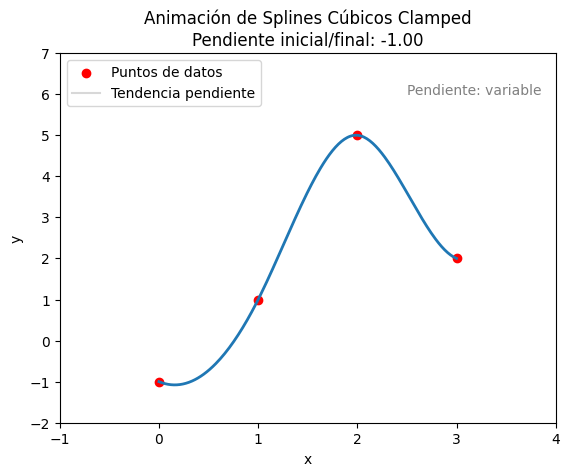

In [ ]:
from matplotlib.animation import FuncAnimation

# Se asume que xs, ys, x_vals ya están definidos y disponibles
%matplotlib inline

b1_values = np.linspace(-1, 1, 10)  # Define the range of slope values for the animation
fig_anim, ax_anim = plt.subplots()

line_anim, = ax_anim.plot([], [], lw=2)
ax_anim.scatter(xs, ys, color='red', label='Puntos de datos')
ax_anim.set_xlim(-1, 4)
ax_anim.set_ylim(-2,7)
ax_anim.set_xlabel('x')
ax_anim.set_ylabel('y')
ax_anim.set_title('Animación de Splines Cúbicos Clamped\nPendiente inicial/final variable')
ax_anim.plot([], [], color='gray', alpha=0.3, label='Tendencia pendiente')
ax_anim.text(2.5, 6, 'Pendiente: variable', fontsize=10, color='gray')


def animate_b1(i):

    fp = b1_values[i]
    splines_anim = cubic_spline_clamped(xs, ys, fp, fp)
    y_anim = np.zeros_like(x_vals)
    for j, S in enumerate(splines_anim):
        mask = (x_vals >= xs[j]) & (x_vals <= xs[j+1])
        y_anim[mask] = [float(S.subs('x', x)) for x in x_vals[mask]]
    line_anim.set_data(x_vals, y_anim)
    ax_anim.set_title(f'Animación de Splines Cúbicos Clamped\nPendiente inicial/final: {fp:.2f}')
    # Animar la tendencia inversa (línea de pendiente opuesta)
    y_trend_inv = -fp * x_vals
    global line_trend_inv
    if 'line_trend_inv' not in globals():
        line_trend_inv, = ax_anim.plot([], [], color='blue', alpha=0.3, label='Tendencia inversa')
    else:
        line_trend_inv.set_data([], [])
    line_trend_inv.set_data(x_vals, y_trend_inv)
    return line_anim, line_trend, line_trend_inv


ani_b1 = FuncAnimation(fig_anim, animate_b1, frames=len(b1_values), interval=100, blit=True)

plt.legend()
plt.show()
# Save the animation as a GIF
ani_b1.save("spline_clamped_animation.gif", writer="pillow")